# Aplicaciones de la integral

En esta sección vamos a estudiar dos aplicaciones inmediatas de la integral de Riemann: el cálculo de áreas de superficies planas y el volumen de sólidos de revolución.

## Cálculo de áreas

### Cálculo del área bajo la gráfica de una función positiva

Dada una función integrable $f:[a,b]\to R$, $f(x)\geq 0$ para todo $x\in [a,b]$ el área de la superficie limitada por la gráfica de $f$, el eje $OX$ y las rectas $x=a,x=b$ viene dada por

$$
A=\int_a^b f(x) dx
$$


<b>Ejemplo:</b> 

Vamos a detallar un ejemplo que incluye alguna integral un poco más difícil que las que vienen siendo habituales. 
Queremos deducir una fórmula que todas y todos conocemos bien: el área de un círculo de radio r.

Empezamos fijándonos en que un semicírculo de radio $r$ está limitado superiormente por la función $f(x)=\sqrt{r^2 - x^2}$, como mostramos en la siguiente figura. 

<img src="../../images/cap4_aplicaciones_1.png" width="300" height="400"/>

Entonces:

$$
A=2\int_{-r}^{r} \sqrt{r^2-x^2} dx \stackrel{(*)}{=}
$$
Para resolver esta integral aplicamos el cambio trigonométrico $x=r\sin(t)$. Fijémonos que $r$ es un dato del problema, por lo que la nueva variable será $t$. Entonces $dx = r\cos(t) \, dt$. 
También tenemos que cambiar los límites de integración: 
* Límite inferior: $x=-r \Rightarrow t=\arcsin\left(\frac{-r}{r}\right) = \arcsin(-1) = -\frac{\pi}{2}$.
* Límite superior: $x=r \Rightarrow t=\arcsin\left(\frac{r}{r}\right) = \arcsin(1) = \frac{\pi}{2}$.


Entonces, la integral del principio se transforma en

$$
\stackrel{(*)}{=} 2\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \sqrt{r^2-r^2\sin^2(t)}\, r\cos(t)\, dt =  
2\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \sqrt{1-\sin^2(t)}\, r^2\cos(t)\, dt = 2r^2\int_{-\pi/2}^{\pi/2} \cos^2 (t) dt \stackrel{(**)}{=}
$$
Y ahora tenemos que usar la relación trigonométrica $\cos^2(t)=\dfrac{1+\cos(2t)}{2}$ para obtener una integral inmediata:

$$
\stackrel{(**)}{=} 2r^2\int_{-\pi/2}^{\pi/2} \frac{1+\cos(2t)}{2} dt = 2r^2\left( \frac{t}{2} + \frac{\sin(2t)}{4} \right] _{-\pi/2}^{\pi/2} = \pi r^2.
$$

Por supuesto, este trabajo se lo podemos dejar a `Sympy`:

In [12]:
import sympy as sp
x = sp.Symbol('x', real=True)
r = sp.Symbol('r', positive=True)
t = sp.Symbol('t')
f_exp = sp.sqrt(r**2-x**2)
A = 2*sp.simplify(sp.integrate(f_exp,(x,-r,r)))
print('El area del circulo de radio r es: ')
display(A)

El area del circulo de radio r es: 


pi*r**2


### Cálculo del área comprendida entre la gráfica de dos funciones

Dadas dos funciones integrables $f,g:[a,b]\to R$, el área de la superficie limitada por la gráfica de $f$, la gráfica de $g$ y las rectas $x=a,x=b$ viene dada por

$$
A=\int_a^b |f(x)-g(x)| dx
$$
Para poder calcular esta integral, en la práctica tenemos que aplicar la definición de valor absoluto y la propiedad de aditividad de la integral respecto a subintervalos.

````{prf:remark} 
:label: rem_aplicaciones 
:nonumber: 

Fíjate que, como caso particular, si queremos calcular la superficie limitada entre una función $f$ (positiva o no) y el eje $OX$, tendremos que hacer:

$$
A=\int_a^b |f(x)-0| dx = \int_a^b |f(x)| dx.
$$

````

<b>Ejemplo:</b> 

Calcular el área de la superficie comprendida entre las gráficas de $y=x^3$ y $y=x$.


$$
A=\int_a^b |f(x)-g(x)| dx \stackrel{(*)}{=}
$$

Para eliminar el valor absoluto, en primer lugar hemos de localizar los puntos de corte entre ambas gráficas, aplicar la aditividad de la integral para subintervalos y comprobar qué gráfica queda por encima de la otra en cada subintervalo:

$$
\stackrel{(*)}{=} \int_{-1}^0 f(x)-g(x) dx+\int_0^1 g(x)-f(x) dx=\int_{-1}^0 (x^3-x) dx+\int_0^1 (x-x^3) dx =\dfrac{1}{2}.
$$

También la podemos calcular mediante `Sympy`:

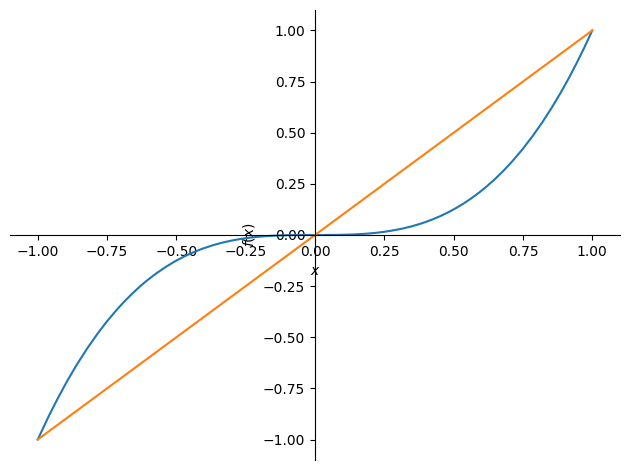

Puntos de corte:  [-1, 0, 1]
El area de la sup comprendida entre las dos graficas es:  1/2


In [13]:
import sympy as sp
x=sp.symbols('x')
f_exp=x**3
g_exp=x
sp.plot((f_exp,(x,-1,1)),(g_exp,(x,-1,1)))
roots=sp.solve(f_exp-g_exp)
print('Puntos de corte: ',roots)
A=sp.integrate(f_exp-g_exp,(x,-1,0))+sp.integrate(g_exp-f_exp,(x,0,1))
print('El area de la sup comprendida entre las dos graficas es: ',A)

## Cálculo de volúmenes

En esta sección vamos a estudiar cómo aplicar la integral al cálculo de volúmenes de sólidos. 

### Principio de Cavalieri

Supongamos que tenemos un sólido tridimensional, $V$, que, al ser cortado por un plano perpendicular al eje $OX$, para cada $x\in[a,b]$, produce una sección de área $A(x)$.  

<img src="../../images/cap4_aplicaciones_2.jpg" width="300" height="400"/>

Entonces el volúmen de $V$, comprendido entre los planos $x=a$ y $x=b$, viene dado por 

$$
V=\int_a^b A(x) dx.
$$

* Puedes verlo con más detalle aquí: https://es.wikipedia.org/wiki/Principio_de_Cavalieri
* En esta aplicación de Geogebra, realizada por Marco Rainaldi, puedes visualizar cortes tridimensionales en muchos ejemplos interesantes: https://www.geogebra.org/m/nbknkjtp.

### Cuerpos de revolución: método de los discos

El método de los discos es un caso particular del método de Cavalieri... para figuras de revolución. En este caso, los cortes serán círculos de radio $|f(x)|$ y, por tanto, con área, $A(x) = \pi f(x)^2$. 

Entonces, dada una función integrable $f:[a,b]\to R$  el volumen del sólido de revolución generado al rotar alrededor del eje $OX$ la superficie comprendida entre la gráfica de $f$, el eje $OX$, entre $x=a,x=b$ viene dada por

$$
V=\pi \int_a^b |f(x)|^2 dx.
$$

Puedes ilustrar el proceso en la siguiente aplicación de Geogebra, realizada por José Luis Vergara Ibarra: https://www.geogebra.org/m/jxkmyeax 

<b>Ejemplo:</b> 

Calcular el volumen de una esfera de radio r.

$$
V=\pi \int_{-r}^{r} \left[\sqrt{r^2-x^2}\right]^2 dx=\pi \int_{-r}^{r} r^2-x^2 dx= \pi\left(r^2x-x^3/3\right]_{-r}^{r}=\dfrac{4}{3}\pi r^3
$$

In [1]:
import sympy as sp
x=sp.symbols('x')
r = sp.Symbol('r', positive=True)
f=sp.sqrt(r**2-x**2)
V=sp.pi*sp.integrate(f**2,(x,-r,r))
print('El volumen del sólido de revolución es: ')
display(V)

El volumen del sólido de revolución es: 


4*pi*r**3/3

Dadas dos funciones integrables $f,g:[a,b]\to R$  el volumen del sólido de revolución generado al rotar alrededor del eje $OX$ la superficie 
    comprendida entre la gráfica de $f$ y la gráfica de $g$, entre $x=a,x=b$ viene dada por

$$
V=\pi \int_a^b |f(x)^2-g(x)^2| dx
$$

<b>Ejemplo:</b> 

Calcular el volumen del sólido de revolución generado al rotar la superficie comprendida entre las gráficas de  $y=x^3$ y $y=x$ alrededor del eje X.


$$
V=\pi \int_a^b |f(x)^2-g(x)^2| dx
$$

De nuevo, para eliminar el valor absoluto, tenemos que calcular los puntos de corte y emplear la aditividad respecto a intervalos.

$$
=\pi\int_{-1}^1 |f(x)^2-g(x)^2| dx=\pi\int_{-1}^0 g(x)^2-f(x)^2 dx+\pi\int_0^1 g(x)^2-f(x)^2 dx=\pi\int_{-1}^0 (x^2-x^6) dx+\pi\int_0^1 (x^2-x^6) dx =\dfrac{8\pi}{21}
$$


In [50]:
import sympy as sp
x=sp.symbols('x')
f=x**3
g=x
roots=sp.solve(f-g)
print('Puntos de corte: ',roots)
V=sp.pi*sp.integrate(g**2-f**2,(x,-1,0))+sp.pi*sp.integrate(g**2-f**2,(x,0,1))
print('El volumen es: ',V)

Puntos de corte:  [-1, 0, 1]
El volumen es:  8*pi/21


También se puede emplear el método de discos para calcular volúmenes de sólidos de revolución generados al rotar una superficie entorno al eje $OY$. En este caso, obtenemos la misma fórmula, pero la integral ahora es en la variable $y$, y por tanto la función debe ir escrita también en la variable $y$

$$
V=\pi \int_c^d |f(y)|^2 dy
$$

<b>Ejemplo:</b> 

Calcular el volumen del sólido generado al rotar alrededor del eje $OY$ la región comprendida entre la parábola $y=x^2$ entre $y=0$ y $y=4$

$$
V=\pi \int_0^4 [\sqrt{y}]^2 dy=\pi\left( \dfrac{y^2}{2} \right]_{0}^{4}=8\pi
$$

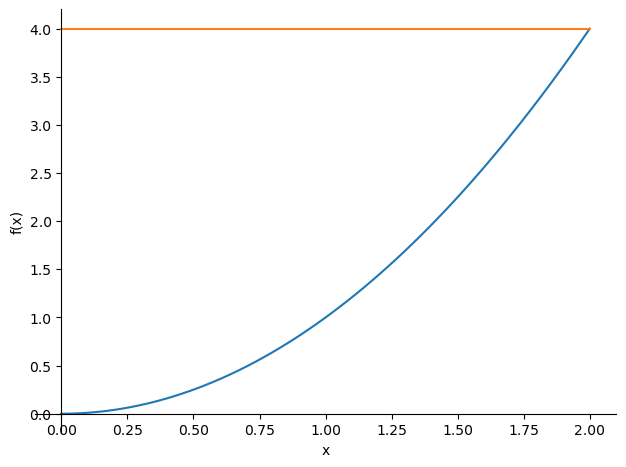

El volumen del solido de revolucion es:  8*pi


In [66]:
import sympy as sp
x,y=sp.symbols('x,y')
sp.plot((x**2,(x,0,2)),(4,(x,0,2)))
f=sp.sqrt(y)
V=sp.pi*sp.integrate(f**2,(y,0,4))
print('El volumen del solido de revolucion es: ',V)

<b>Ejercicio:</b> 

Calcular el volumen del sólido generado al rotar alrededor del eje $OY$ la región comprendida entre la parábola $y^2=8x$ y la recta $x=2$

## Para seguir practicando

Puedes encontrar más ejercicios aquí:

* Página (en el portal de Geogebra) de Daniel Partal García, profesor en el Colegio Marista de La Inmaculada (Granada), con un montón de ejercicios planteados y resueltos: https://www.geogebra.org/m/x8zyquyk#material/sqjs77gg
* El blog de siempre: https://existelimite.blogspot.com/search/label/Aplicaciones%20de%20la%20integral
